In [42]:
#Load modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
# Cargar datos indice de precios

df = pd.read_csv('./IPC.csv')
df['FECHA'] = pd.to_datetime(df['FECHA'], infer_datetime_format = True)
df = df.set_index('FECHA').sort_index(ascending = True)

#Completar indice congreso con datos nuevo indec
df['IPC'] = (df['CONGRESO'].fillna(df['ipc_2016_nivgeneral'])/100.)
# df['IPC'] = (df['ipc_2016_nivgeneral'].fillna(df['CONGRESO'])/100.)

#Integracion 3, 6, 12 meses
df['IPC_12M'] = 100*pd.rolling_apply(df['IPC'], 12, lambda x: np.prod(1 + x)-1)
df['IPC_6M'] = 100*pd.rolling_apply(df['IPC'], 6, lambda x: np.prod(1 + x)-1)
df['IPC_3M'] = 100*pd.rolling_apply(df['IPC'], 3, lambda x: np.prod(1 + x)-1)

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).apply(args=<tuple>,func=<function>,kwargs=<dict>)
/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=6).apply(args=<tuple>,func=<function>,kwargs=<dict>)
/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=3).apply(args=<tuple>,func=<function>,kwargs=<dict>)


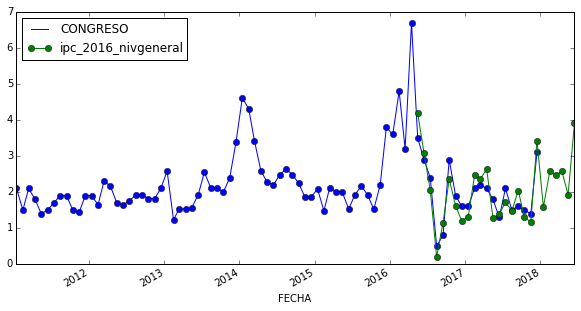

In [218]:
#muestra datos inflacion

fig, ax = plt.subplots(1, figsize=(10, 5))

df[['CONGRESO']].plot(ax = ax, marker = 'o')
df[['ipc_2016_nivgeneral']].plot(ax = ax, marker = 'o')

plt.savefig('./ref_IPC.png')

In [204]:
#Tasa de cambio

df_2 = pd.read_csv('./exchange_rate_BCRA.csv', delimiter = ';')

df_2['FECHA'] = pd.to_datetime(df_2['FECHA'], infer_datetime_format = True)
df_2['VALOR'] = df_2['VALOR'].str.replace(',', '.').astype(float)
df_2 = df_2.set_index('FECHA')

df_2 = pd.DataFrame(df_2.VALOR.resample('W').mean())
df_2['4w_deval'] = df_2.pct_change(4)

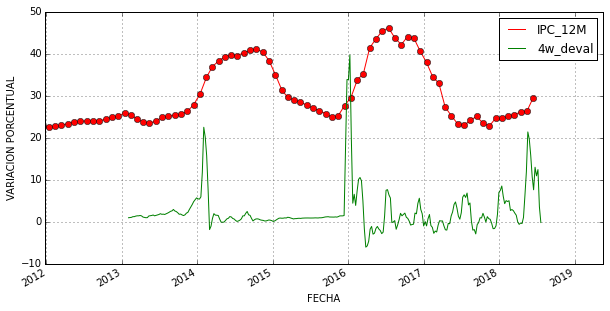

In [224]:
#Comparacion devaluacion inflacion

fig, ax = plt.subplots(1, figsize=(10, 5))

df[['IPC_12M']].plot(marker = 'o', ax = ax, c = 'r')
# df[['IPC_6M']].plot(marker = 'o', ax = ax)
# df[['IPC_3M']].plot(marker = 'o', ax = ax)

(100*df_2[['4w_deval']]).plot(ax = ax, )

ax.xaxis.grid(True); ax.yaxis.grid(True)

ax.set_xlim(734500, 737200)
ax.set_ylabel('VARIACION PORCENTUAL')

plt.savefig('./ipc3M_deval.png')